In [337]:
import csv
import numpy as np
from sklearn.cluster import KMeans

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math
from matplotlib import cm
%matplotlib inline

In [338]:
n_clusters = 20

In [339]:
with open('q3dm1-path1.csv') as f:
    reader = csv.reader(f, delimiter=',')
    coords = np.array([map(np.float32, line) for line in reader])

activities = np.diff(coords, axis=0)

estimator = KMeans(init='k-means++', n_clusters=n_clusters, n_init=10)
estimator.fit(activities)
labels = estimator.labels_


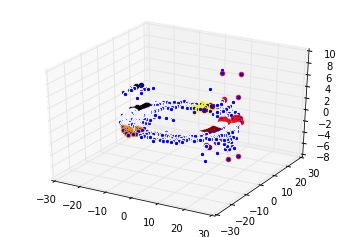

In [340]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i, act in enumerate(activities):    
    ax.scatter(act[0], act[1], act[2], color=cm.hot(labels[i]*50))

plt.show()

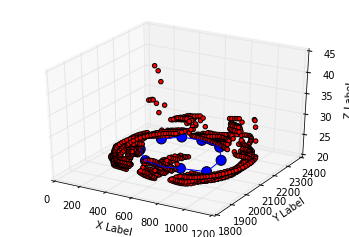

In [341]:
def distance(point1, point2):                                                   
    dist = 0                                                                    
    for i in range(len(point1)):                                                
        dist += (point1[i] - point2[i]) * (point1[i] - point2[i])               
    return math.sqrt(dist)   

def SOM(X, k, dim, tmax):    
    weights = np.zeros((k,3), dtype=np.float)                                   
    # initializing weights                                                      
    for i in range(k):                                                          
        point = np.random.randint(0, dim)                                       
        for j in range(3):                                                      
            weights[i,j] = X[point,j]                                           
                                                                                  
    D = np.zeros((k,k), dtype=np.float)                                         
    for i in range(k):                                                          
        for j in range(k):                                                      
            if( abs(i-j) <= (k//2) ):                                           
                D[i,j] = abs(i-j)                                               
            else:                                                               
                D[i,j] = abs(abs(i-j) - k)                                      
                                                                                                                                                        
    plt.ion()                                                                   
    fig = plt.figure()                                                          
    ax = fig.add_subplot(111, projection='3d')                                  
    sc_data = ax.scatter(X[:,0], X[:,1], X[:,2], zorder=1, c='r', alpha=1)      
    ax.plot(weights[:,0], weights[:,1], weights[:,2], c='b')                    
    sc_neurons = ax.scatter(weights[:,0], weights[:,1], weights[:,2], zorder=4, s=100, marker='o',c='b', alpha=1)
    ax.set_xlabel('X Label')                                                    
    ax.set_ylabel('Y Label')                                                    
    ax.set_zlabel('Z Label')                                                    
    fig.show()                                                                  
                                                                                  
                                                                                  
    for t in range(tmax):                                                       
        plt.pause(0.001)                                                        
        # randomly sample a point                                               
        random_point = X[np.random.randint(0, dim),:]                           
                                                                                
        # determine a winning neuron                                            
        winning_neuron = weights[0,:]                                           
        winning_neuron_index = 0            

        dist = distance(winning_neuron, random_point) 
        
        for i in range(1,k):                                                    
            dist_temp = distance(weights[i,:], random_point)                    
            if( dist_temp < dist):                                              
                winning_neuron = weights[i,:]                                   
                winning_neuron_index = i                   
                dist = dist_temp                                                
                                                                                  
        learn_rate = (1.0-float(t)/float(tmax))                                 
        sigma = math.exp(-float(t)/float(tmax))                                 
        for i in range(0,k):                                                                                                                            
            dd = distance(winning_neuron, weights[i,:])                         
            for j in range(3):                                                  
                weights[i,j] += learn_rate*math.exp(-( D[winning_neuron_index,i] )/ (2.0*sigma) )*(random_point[j]-weights[i,j])
                                                                                  
        sc_neurons._offsets3d = (weights[:,0], weights[:,1], weights[:,2])      
        plt.draw()
    return weights
             
n_of_states = 10
weights = SOM(coords, n_of_states, coords.shape[0], 100)                

In [342]:
states = []
for coord in coords:
    states.append(np.argmin([distance(coord, s) for s in weights]))
#let's assume that states are true

probability_table = np.zeros((n_of_states, n_clusters))
for i in range(len(coords) - 1):
    curr_s = states[i]
    curr_r = labels[i]
    probability_table[curr_s,curr_r] += 1
    
print(probability_table)
normalized_probs = probability_table / np.sum(probability_table)
print(normalized_probs)

[[ 11.   0.   0.   0.  42.   0.   0.   0.   0.   0.   0.   4.   4.  10.
   39.   0.  62.   0.   0.  18.]
 [ 27.   0.   0.   0.   0.   0.  12.   0.   0.   0.   0.  33.  34.   0.
    0.   0.   0.   0.   0.  23.]
 [ 29.   0.   0.   0.   0.   0.   5.   0.   0.   0.   0.  23.  14.   0.
    0.   0.   0.   0.   0.  31.]
 [ 17.   0.   0.   0.   0.   0.  12.   0.   0.   0.   1.  28.  26.   0.
    0.   0.   0.   0.   0.  15.]
 [  0.   0.   0.  26.   0.  16.  39.   0.   0.   1.  53.  17.  20.   0.
    0.   0.   0.   0.   0.   0.]
 [  0.  18.   0.   3.   0.  28.   0.   5.  21.  30.   0.   0.   0.   0.
    0.   0.   0.   1.  44.   0.]
 [  0.  48.   0.   0.   0.   0.   0.  31.  22.   5.   0.   0.   0.   0.
    0.   7.   0.  12.   6.   0.]
 [  0.  23.   6.   0.   0.   0.   0.  26.   1.   0.   0.   0.   0.   0.
    0.  23.   0.  31.   0.   0.]
 [  0.  11.  14.   0.   0.   0.   0.  16.   0.   0.   0.   0.   0.   0.
    0.  24.   0.  34.   0.   0.]
 [  0.   0.  57.   0.   6.   0.   0.   2.   0.   0.   0

In [343]:
def color_map(map, x_len, y_len):                                                   
    fig = plt.figure(figsize=(x_len, y_len))                                                                                                                 
    ax = fig.add_subplot(111)                                               
    ax.set_title('Board ')                                                  
    plt.imshow(map)                                                         
    ax.set_aspect('equal')                                                                                                                                   
    cax = fig.add_axes([0.12, 0.1, 0.78, 0.8])                              
    cax.get_xaxis().set_visible(False)                                      
    cax.get_yaxis().set_visible(False)                                      
    cax.patch.set_alpha(0)                                                  
    cax.set_frame_on(False)                                                 
    plt.colorbar(orientation='vertical')                                    
    plt.show()  

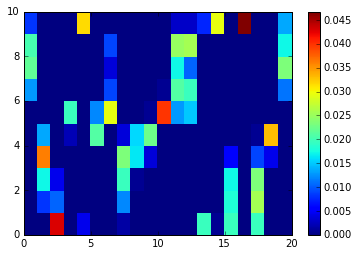

In [344]:
#color_map(normalized_probs, n_of_states, n_clusters)
plt.pcolor(normalized_probs[::-1])
plt.colorbar()
plt.show()

In [345]:
curr_ind = np.random.randint(len(coords))
generated_traj = [coords[curr_ind]]
for i in range(2000):
    curr_pt = generated_traj[i]
    closest_state = np.argmin([distance(curr_pt, s) for s in weights])
    action_cluster_ind = np.argmax(normalized_probs[closest_state]) #TODO check if we do correct
    possible_actions = activities[labels==action_cluster_ind]
    #generated_traj.append(curr_pt+np.mean(possible_actions, axis=0))
    generated_traj.append(curr_pt+possible_actions[np.random.randint(len(possible_actions))])

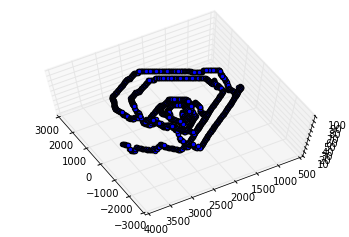

In [346]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(70, 150)
#ax.set_ylim(ymin=0.06)

for act in generated_traj:    
    ax.scatter(act[0], act[1], act[2])

plt.show()